### Machines Learning with Python - Linear Regression 

In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf

In [69]:
start_date = datetime(2010, 1 , 1)
end_date = datetime(2021, 12, 31)

stock_data = yf.download('SPY MSFT',
                         interval = "1mo",
                         start = start_date,
                         end = end_date)
stock_data.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                   High  \
                 MSFT        SPY       MSFT         SPY       MSFT   
Date                                                                 
2010-01-01  21.462662  83.499344  28.180000  107.389999  31.240000   
2010-02-01  21.835857  86.104057  28.670000  110.739998  29.030001   
2010-03-01  22.412392  90.971436  29.290001  117.000000  30.570000   
2010-04-01  23.368866  92.759224  30.540001  118.809998  31.580000   
2010-05-01  19.741879  85.389069  25.799999  109.370003  31.059999   

                              Low                   Open              \
                   SPY       MSFT         SPY       MSFT         SPY   
Date                                                                   
2010-01-01  115.139999  27.660000  107.220001  30.620001  112.370003   
2010-02-01  111.580002  27.570000  104.580002  28.389999  108.150002   
2010-03-01  118.169998  28.240000  111.169998  28.770000  111.199997   
2010-04-01  122.120003  28.620001  117.099998  29.350000  117.800003   
2010-05-01  120.680000  24.559999  104.379997  30.670000  119.379997   

                Volume              
                  MSFT         SPY  
Date                                
2010-01-01  1359650900  3706842300  
2010-02-01  1074643300  4451912400  
2010-03-01  1110237200  3899688500  
2010-04-01  1319029500  3887089700  
2010-05-01  1720130200  7413878800

In [70]:
stock_data.columns

MultiIndex([('Adj Close', 'MSFT'),
            ('Adj Close',  'SPY'),
            (    'Close', 'MSFT'),
            (    'Close',  'SPY'),
            (     'High', 'MSFT'),
            (     'High',  'SPY'),
            (      'Low', 'MSFT'),
            (      'Low',  'SPY'),
            (     'Open', 'MSFT'),
            (     'Open',  'SPY'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'SPY')],
           )

In [71]:
stock_data_adj_close = stock_data.iloc[:,stock_data.columns.get_level_values(0) == 'Adj Close'].pct_change().dropna()
stock_data_adj_close.columns = ['MSFT','SPY']
stock_data_adj_close.head()

,MSFT,SPY
Date,,
2010-02-01,0.017388,0.031194
2010-03-01,0.026403,0.056529
2010-04-01,0.042676,0.019652
2010-05-01,-0.155206,-0.079455
2010-06-01,-0.104116,-0.056231


In [72]:
from seaborn import scatterplot

<Axes: xlabel='MSFT', ylabel='SPY'>

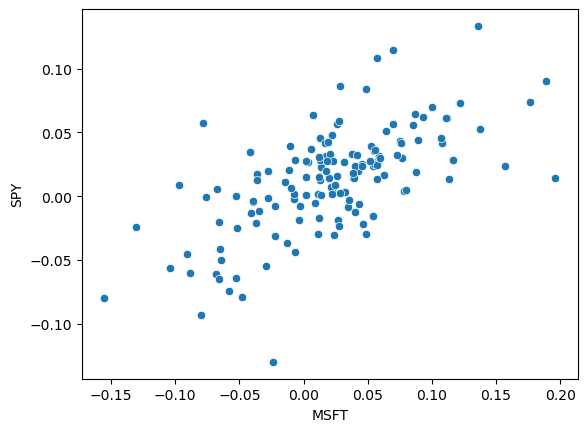

In [73]:
scatterplot(data = stock_data_adj_close, x = 'MSFT', y = 'SPY')

In [74]:
x = stock_data_adj_close.SPY.values

ones = np.ones(len(x))

x = np.vstack((ones,x))

x = x.T

y = stock_data_adj_close.MSFT.values

In [75]:
betas = np.linalg.inv(x.T @ x) @ x.T @ y
print(betas)

[0.00867069 0.96868145]


In [76]:
x = x[:,1]

In [77]:
# initialize the parameters at 0 (not always a good idea)
b_1 = 0.01
b_0 = 0.01

alpha = 0.1 # Learning rate
epochs = 50000 # Number of descent iterations

n = float(len(x)) # Number of elements in x

# Gradient descent
for i in range(epochs):
    y_pred = b_1*x + b_0 # Current predicted value of y
    D_b_1 = (-2/n) * sum(x * (y - y_pred)) # Derivated wrt b_1
    D_b_0 = (-2/n) * sum(y - y_pred) # Derivative wrt b_0
    b_1 = b_1 - alpha * D_b_1 # Update b_1
    b_0 = b_0 - alpha * D_b_0 # Update b_0

print(b_0,b_1)

0.008670693899914796 0.9686813846754929


Now let's see how is done using sklearn

In [78]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [79]:
# Keep in mind we would need to split this data, However, this data is timeseries so we can only test it by using it to predict forward
regr = LinearRegression()
x = x.reshape(-1,1) # shape needed for sklearn
regr.fit(x,y)
print(regr.score(x,y)) # give us r^2

0.41510514746614235


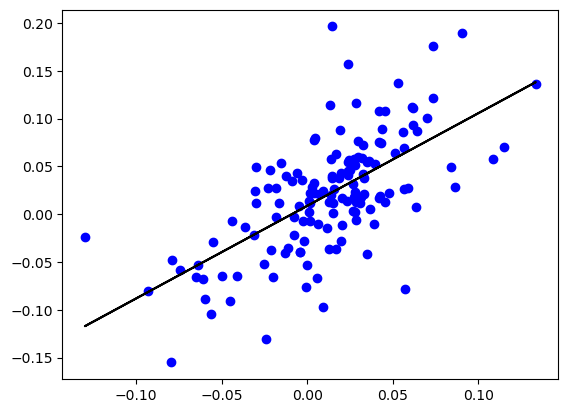

In [80]:
plt.scatter(x,y, color = 'b')
plt.plot(x,regr.predict(x),color='k')

plt.show()

In [91]:
#Predict going forward
start_date = datetime(2022,1,1)
end_date = datetime(2022,12,31)

stock_data = yf.download('MSFT SPY',
                         interval = "1mo",
                         start=start_date,
                         end=end_date)

stock_data_adj_close = stock_data.iloc[:, stock_data.columns.get_level_values(0) == 'Adj Close'].pct_change().dropna()

stock_data_adj_close.columns = ['MSFT', 'SPY']

x = stock_data_adj_close.SPY.values
x = x.reshape(-1,1)

y = stock_data_adj_close.MSFT.values

[*********************100%***********************]  2 of 2 completed


In [92]:
from sklearn.metrics import r2_score

r2_score(y,regr.predict(x))

0.6960132076031037

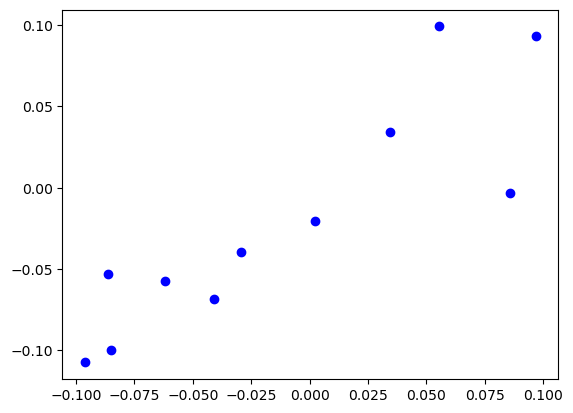

In [93]:
plt.scatter(x,y,color = 'b')

plt.show()